In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import scipy.sparse
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output

from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

from benchmarking import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_path = "/home/ubuntu/single-cell-scVI/data/neuron_9k/"

# preprocessing

In [4]:
gene_names = pd.read_csv(data_path + "filtered_gene_bc_matrices/mm10/genes.tsv", index_col=0, header=None,sep="\t")
barcodes = pd.read_csv(data_path + "filtered_gene_bc_matrices/mm10/barcodes.tsv", index_col=0, header=None,sep="\t")
expression = pd.DataFrame(scipy.io.mmread(data_path + "filtered_gene_bc_matrices/mm10/matrix.mtx").T.A, \
                          columns=gene_names.index, index=barcodes.index)
expression.shape 

(9128, 27998)

In [5]:
selected = np.std(expression, axis=0).argsort()[-3000:][::-1]
expression = expression[gene_names.index[selected]]
gene_names = expression.columns.astype(str)

In [6]:
expression.head()

,ENSMUSG00000052305,ENSMUSG00000069919,ENSMUSG00000069917,ENSMUSG00000073940,ENSMUSG00000072235,ENSMUSG00000092341,ENSMUSG00000019874,ENSMUSG00000049775,ENSMUSG00000064357,ENSMUSG00000029580,...,ENSMUSG00000025137,ENSMUSG00000055204,ENSMUSG00000041112,ENSMUSG00000020801,ENSMUSG00000070372,ENSMUSG00000027879,ENSMUSG00000031917,ENSMUSG00000027782,ENSMUSG00000036707,ENSMUSG00000018669
0,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGACGCTTT-1,0,1,0,0,1,107,2,24,52,6,...,0,1,0,1,1,0,0,0,0,0
AAACCTGAGATCTGCT-1,0,0,0,0,131,176,0,149,61,51,...,3,1,0,0,2,0,0,1,0,0
AAACCTGAGGTCATCT-1,1,0,0,0,49,113,1,27,19,7,...,0,0,0,0,0,0,0,0,0,0
AAACCTGCAAGAGTCG-1,0,0,0,1,187,52,3,148,87,27,...,0,0,0,1,0,0,0,0,0,0
AAACCTGCACACATGT-1,2,0,1,0,32,111,133,226,151,46,...,0,4,0,1,3,2,1,1,0,0


## now clusters and qc

In [7]:
raw_qc = pd.read_csv(data_path + "molecule_qc.txt", index_col=0, sep="\t")
cell_qc = raw_qc.columns
raw_qc = raw_qc.loc[expression.index].as_matrix()
#clusters = pd.read_csv(data_path + "analysis/clustering/graphclust/clusters.csv", index_col=0)
clusters = pd.read_csv(data_path + "analysis/clustering/kmeans_10_clusters/clusters.csv", index_col=0)
clusters = clusters.loc[expression.index].as_matrix()

In [8]:
np.unique(clusters)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
expression_train, expression_test, \
c_train, c_test, \
qc_train, qc_test = \
                train_test_split(expression.as_matrix(), clusters, raw_qc, random_state=0)

In [61]:
scipy.sparse.save_npz(data_path + "data_train.npz", scipy.sparse.coo_matrix(expression_train))
scipy.sparse.save_npz(data_path + "data_test.npz", scipy.sparse.coo_matrix(expression_test))


np.savetxt(data_path + "label_train", c_train)
np.savetxt(data_path + "label_test", c_test)

np.save(data_path + "qc_train", qc_train)
np.save(data_path + "qc_test", qc_test)

# train scVI

In [9]:
from model import vae
from model import scVI_final as scVI
from model.vae import format_time
import tensorflow as tf
import scipy.stats as stats
import time

In [10]:
batch_size = 128
learning_rate = 0.0004
epsilon = 0.01

In [11]:
log_library_size = np.log(np.sum(expression_train, axis=1))
mean, var = np.mean(log_library_size), np.var(log_library_size)

In [12]:
def next_batch(data, batch_size):
    index = np.random.choice(np.arange(data.shape[0]), size=batch_size)
    return data[index]

In [13]:
def train_model(num_epochs, expression_train, expression_test, step, kl=1):
    iterep = int(expression_train.shape[0]/float(batch_size))-1
    training_history = {"t_loss":[], "v_loss":[], "time":[], "epoch":[]}
    training_history["n_hidden"] = model.n_hidden
    training_history["model"] = model.__class__.__name__
    training_history["n_input"] = model.n_input
    training_history["dropout_nn"] = model.dropout_rate
    training_history["learning_rate"] = learning_rate
    training_history["dispersion"] = model.dispersion
    training_history["epsilon"] = epsilon
    training_history["n_layers"] = model.n_layers
    begin = time.time()
    
    
    for t in range(iterep * num_epochs):
    
        # arange data in batches
        x_train = next_batch(expression_train, batch_size)
        x_test = next_batch(expression_test, batch_size)

        #prepare data dictionaries
        dic_train = {expression: x_train, training_phase:True, kl_scalar:kl}
        dic_test = {expression: x_test, training_phase:False, kl_scalar:kl} 

        # run an optimization set
        _, l_tr = sess.run([step, model.loss], feed_dict=dic_train)
        end_epoch, epoch = t % iterep == 0, t / iterep

        if end_epoch:
            now = time.time()
            print epoch

            l_t = sess.run((model.loss), feed_dict=dic_test)

            training_history["t_loss"].append(l_tr)
            training_history["v_loss"].append(l_t)
            training_history["time"].append(format_time(int(now-begin)))
            training_history["epoch"].append(epoch)
            
            print 'Train / Test performance:', l_tr, l_t
            print "Elapsed Time:", training_history["time"][-1]
            if np.isnan(l_tr):
                break
    return training_history

In [14]:
def sample_posterior(X):
    # shape and simulation
    results = {}

    dic_x = {expression: X, training_phase:False, kl_scalar:1.} 
    z_m, l_m = sess.run((model.z, model.library), feed_dict=dic_x)
    dic_z = {model.z: z_m, model.library:l_m, training_phase:False, kl_scalar:1.}
    rate, dropout = sess.run((model.px_rate, model.px_dropout), feed_dict=dic_z)
    
    dispersion = np.tile(sess.run((tf.exp(model.px_r))), (rate.shape[0], 1))
    
    results["library"] = l_m
    results["mean"] = rate
    results["latent"] = z_m
    results["dispersion"] = dispersion
    results["dropout"] = dropout
    return results

In [15]:
def process_proba(logit_dropout, mean=None, dispersion=None, logits=False, agg=None):
    
    p = 1 / (1 + np.exp(- logit_dropout))
    if mean is not None:
        p = (1-p) / scipy.special.gamma(dispersion) * np.power(dispersion / (dispersion + mean), dispersion) 
        
    p[p > 1] = np.max(p[p < 1])
    p[p == 0] = np.min(p[p > 0])

    return p

In [16]:
def normalize_plot(x, y, z, s="", logit=True, normalize=True, plot=True):
    """
    plot to verify that x and y is correlated with z
    """
    
    if logit:
        # take logits before averaging
        x = np.log(x / (1-x))
        y = np.log(y / (1-y))
        
    # test shapes
    if z.shape[0] == x.shape[0]:
        #average across genes
        x = np.mean(x, axis=1)
        y = np.mean(y, axis=1)
    
    elif z.shape[0] == x.shape[1]:
        # we got a gene problem, ave ac. cells
        x = np.mean(x, axis=0)
        y = np.mean(y, axis=0)
    
    else: 
        print "Wrong shapes !"
    
    if normalize:
        # normalization workflow
        x = x - np.mean(x)
        x /= np.std(x)
        y = y - np.mean(y)
        y /= np.std(y)
        z = z - np.mean(z)
        z /= np.std(z)
    
    if plot:
        # scattering workflow
        f, axarr = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))
        axarr[0].scatter(x, z, alpha=0.5)
        axarr[1].scatter(y, z, alpha=0.5)
    
    if normalize:
        if plot:
            axarr[0].axis((-3,3,-3,3))
            axarr[1].axis((-3,3,-3,3))   
        # regression workflow
        a_x, intercept, r_value_x, p_value_x, std_err = stats.linregress(x,z)
        
        if plot:
            l = np.linspace(-3, 3)
            axarr[0].plot(l, a_x * l, color='black')
            supp = "a={0:.2f} \np={1:.1e}".format(a_x, p_value_x)
            if a_x >0.1:
                axarr[0].text(1, -2.2, supp, fontsize=12)
            else:
                axarr[0].text(1, 2.2, supp, fontsize=12) 
            
            
        a_y, intercept, r_value_y, p_value_y, std_err = stats.linregress(y,z)
        
        if plot:
            supp = "a={0:.2f} \np={1:.1e}".format(a_y, p_value_y)
            l = np.linspace(-3, 3)
            axarr[1].plot(l, a_y * l, color='black')
            if a_y >0.1:
                axarr[1].text(1, -2.2, supp, fontsize=12)
            else:
                axarr[1].text(1, 2.2, supp, fontsize=12) 
      
    if plot:
        axarr[0].set_xlabel("Bernouilli zero prob")
        axarr[1].set_xlabel("NB zero prob")
        axarr[0].set_ylabel(s)

    return a_x, r_value_x, a_y, r_value_y

In [14]:
list_plots = ["emp_gene_detection", "emp_lib_size", \
              cell_qc[2], cell_qc[4], cell_qc[5]]
trials = 5
list_cell_types = np.unique(clusters)

In [17]:
res = np.zeros((trials, len(list_cell_types), len(list_plots), 4))

for t in range(trials):
    # train the model for each random seed
    tf.reset_default_graph()
    expression = tf.placeholder(tf.float32, (None, expression_train.shape[1]), name='x')
    kl_scalar = tf.placeholder(tf.float32, (), name='kl_scalar')
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, epsilon=epsilon)
    training_phase = tf.placeholder(tf.bool, (), name='training_phase')

    model = scVI.scVIModel(expression=expression, kl_scale=kl_scalar, \
                             optimize_algo=optimizer, phase=training_phase, \
                              library_size_mean=mean, library_size_var=var, \
                              n_latent=5, log_variational=True)

    # Session creation
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    train_model(100, expression_train, expression_test, model.train_step)
    # then perform the analysis for each cell type
    for k in list_cell_types:

        indices = np.where(c_train == k)[0]
        data = expression_train[indices]
        qc = qc_train[indices]
        results = sample_posterior(data)
        res[t, k - 1, 0] = normalize_plot(process_proba(results["dropout"]), \
               process_proba(results["dropout"], results["mean"], results["dispersion"]), 
               np.sum(data > 0, axis=1), s="number of gene detected", plot=False)
        res[t, k - 1, 1] = normalize_plot(process_proba(results["dropout"]), \
               process_proba(results["dropout"], results["mean"], results["dispersion"]), 
               np.log(np.sum(data, axis=1)), s="log average counts per cells",  plot=False)
        for i, qc_number in enumerate([2, 4, 5]):
            res[t, k - 1, 2 + i] = normalize_plot(process_proba(results["dropout"]), \
                   process_proba(results["dropout"], results["mean"], results["dispersion"]), \
                   qc[:, qc_number], cell_qc[qc_number], plot=False)

Running scVI on 3000 genes
scVI will run without batch correction
Will work on mode numeric for incorporating library size
Will work on mode gene for modeling inverse dispersion param
Will apply zero inflation
1 hidden layers at 128 each for a final 5 latent space
0
Train / Test performance: 47658.3 42731.8
Elapsed Time: 0:00:00
1
Train / Test performance: 22224.6 22608.8
Elapsed Time: 0:00:02
2
Train / Test performance: 10041.6 17999.2
Elapsed Time: 0:00:05
3
Train / Test performance: 5349.95 13259.5
Elapsed Time: 0:00:07
4
Train / Test performance: 4783.15 12040.1
Elapsed Time: 0:00:10
5
Train / Test performance: 4874.37 7149.76
Elapsed Time: 0:00:12
6
Train / Test performance: 4819.45 5763.26
Elapsed Time: 0:00:15
7
Train / Test performance: 4677.26 5526.7
Elapsed Time: 0:00:17
8
Train / Test performance: 4453.1 4905.2
Elapsed Time: 0:00:19
9
Train / Test performance: 4593.36 5452.77
Elapsed Time: 0:00:22
10
Train / Test performance: 4590.08 5050.8
Elapsed Time: 0:00:25
11
Train / T

16
Train / Test performance: 4208.64 4596.3
Elapsed Time: 0:00:36
17
Train / Test performance: 4188.95 4495.0
Elapsed Time: 0:00:38
18
Train / Test performance: 4229.58 4811.77
Elapsed Time: 0:00:40
19
Train / Test performance: 4276.41 5268.07
Elapsed Time: 0:00:43
20
Train / Test performance: 4271.07 4557.11
Elapsed Time: 0:00:45
21
Train / Test performance: 4294.77 6426.33
Elapsed Time: 0:00:47
22
Train / Test performance: 4362.69 4397.47
Elapsed Time: 0:00:50
23
Train / Test performance: 4102.57 4449.22
Elapsed Time: 0:00:52
24
Train / Test performance: 4146.11 4440.79
Elapsed Time: 0:00:55
25
Train / Test performance: 4156.87 4742.9
Elapsed Time: 0:00:57
26
Train / Test performance: 4081.43 4618.17
Elapsed Time: 0:00:59
27
Train / Test performance: 4127.15 4434.51
Elapsed Time: 0:01:02
28
Train / Test performance: 4317.05 4640.01
Elapsed Time: 0:01:04
29
Train / Test performance: 4075.08 4183.5
Elapsed Time: 0:01:06
30
Train / Test performance: 4076.21 4701.59
Elapsed Time: 0:01:09

35
Train / Test performance: 4123.87 4328.13
Elapsed Time: 0:01:22
36
Train / Test performance: 3992.49 4338.34
Elapsed Time: 0:01:24
37
Train / Test performance: 4038.86 4234.3
Elapsed Time: 0:01:26
38
Train / Test performance: 3996.85 4603.12
Elapsed Time: 0:01:29
39
Train / Test performance: 4084.51 4506.16
Elapsed Time: 0:01:31
40
Train / Test performance: 4392.67 4387.71
Elapsed Time: 0:01:34
41
Train / Test performance: 4044.75 4328.52
Elapsed Time: 0:01:36
42
Train / Test performance: 4012.43 4214.02
Elapsed Time: 0:01:38
43
Train / Test performance: 3865.53 4316.92
Elapsed Time: 0:01:40
44
Train / Test performance: 3954.21 4423.58
Elapsed Time: 0:01:43
45
Train / Test performance: 4088.78 4650.15
Elapsed Time: 0:01:45
46
Train / Test performance: 3860.98 4393.1
Elapsed Time: 0:01:47
47
Train / Test performance: 4170.73 4081.31
Elapsed Time: 0:01:50
48
Train / Test performance: 4076.59 4261.13
Elapsed Time: 0:01:52
49
Train / Test performance: 3975.09 4108.55
Elapsed Time: 0:01:

54
Train / Test performance: 4290.16 4603.71
Elapsed Time: 0:02:06
55
Train / Test performance: 3976.65 4023.47
Elapsed Time: 0:02:09
56
Train / Test performance: 4048.04 4316.09
Elapsed Time: 0:02:11
57
Train / Test performance: 3909.61 4365.85
Elapsed Time: 0:02:13
58
Train / Test performance: 3874.02 3887.55
Elapsed Time: 0:02:16
59
Train / Test performance: 3867.3 4062.63
Elapsed Time: 0:02:18
60
Train / Test performance: 3846.94 4129.0
Elapsed Time: 0:02:21
61
Train / Test performance: 4030.65 4335.27
Elapsed Time: 0:02:23
62
Train / Test performance: 4060.32 4196.48
Elapsed Time: 0:02:25
63
Train / Test performance: 3882.13 4162.33
Elapsed Time: 0:02:28
64
Train / Test performance: 3938.74 4474.98
Elapsed Time: 0:02:30
65
Train / Test performance: 3949.5 4606.8
Elapsed Time: 0:02:32
66
Train / Test performance: 4033.79 4108.05
Elapsed Time: 0:02:35
67
Train / Test performance: 3966.8 3953.19
Elapsed Time: 0:02:37
68
Train / Test performance: 4010.93 3943.07
Elapsed Time: 0:02:39


/home/romain/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/home/romain/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract


Running scVI on 3000 genes
scVI will run without batch correction
Will work on mode numeric for incorporating library size
Will work on mode gene for modeling inverse dispersion param
Will apply zero inflation
1 hidden layers at 128 each for a final 5 latent space
0
Train / Test performance: 50609.4 39747.3
Elapsed Time: 0:00:00
1
Train / Test performance: 24142.7 18678.6
Elapsed Time: 0:00:02
2
Train / Test performance: 9283.51 15586.4
Elapsed Time: 0:00:04
3
Train / Test performance: 5412.33 15385.3
Elapsed Time: 0:00:07
4
Train / Test performance: 4852.1 8915.97
Elapsed Time: 0:00:09
5
Train / Test performance: 5035.4 7817.76
Elapsed Time: 0:00:11
6
Train / Test performance: 4575.5 5397.38
Elapsed Time: 0:00:14
7
Train / Test performance: 4880.64 5505.84
Elapsed Time: 0:00:16
8
Train / Test performance: 4530.97 5027.36
Elapsed Time: 0:00:18
9
Train / Test performance: 4529.24 5144.93
Elapsed Time: 0:00:21
10
Train / Test performance: 4559.46 4696.4
Elapsed Time: 0:00:23
11
Train / T

In [15]:
cell_info = np.unique(c_train, return_counts=True)[1]

In [16]:
cell_info

array([2592, 1317,  961,  689,  589,  486,   78,   56,   49,   29])

In [47]:
np.save("9k_neurons_DE_statistics_multi_celltypes.npy", res)

In [17]:
res = np.load("9k_neurons_DE_statistics_multi_celltypes.npy")

In [18]:
t_stats = np.zeros((trials, 6, len(list_plots), 2))
p_values = np.zeros_like(t_stats)
# get the t_stats from the regression value
for t in range(5):
    for k in range(6):
        for i in range(len(list_plots)):
            for j in range(2):
                r = res[t, k, i, 2*j +1]
                n = cell_info[k]
                t_stats[t, k, i, j] = r * np.sqrt((n - 2)/(1 - r**2))
                p_values[t, k, i, j] = 2 * scipy.stats.distributions.t.sf(np.abs(t_stats[t, k, i, j]), n)

In [19]:
# concat p_values across experiments and cell types
p_values = p_values.reshape((trials * 6, len(list_plots), 2))
t_stats = t_stats.reshape((trials * 6, len(list_plots), 2))
scores = - np.sign(t_stats) * np.log10(p_values)
#scores = -np.log10(p_values)

/home/ubuntu/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [20]:
def finite(x):
    return x[np.isfinite(x)]

In [21]:
import matplotlib.patches as mpatches

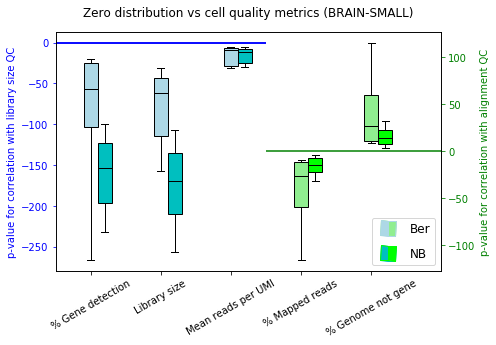

In [22]:
list_plots = ["% Gene detection", "Library size", \
               "Mean reads per UMI", "% Mapped reads", "% Genome not gene"]

data_1 = [finite(scores[:, i, 0]) for i in [0, 1, 2]]
data_1b = [finite(scores[:, i, 1]) for i in [0, 1, 2]]

props = dict(widths=0.2,patch_artist=True, medianprops=dict(color="black"), whis=[5, 95], sym="")
fig, ax1 = plt.subplots(figsize=(7, 5))
ax1.hlines(y=0, xmin=-0.5, xmax=2.5, color='blue', zorder=1)    
ax1.set_ylabel('p-value for correlation with library size QC', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()

bp1 = ax1.boxplot(data_1, positions=[0, 1, 2], **props)
bp1b = ax1.boxplot(data_1b, positions=[0.2, 1.2, 2.2], **props)
ax1.hlines(y=0, xmin=-0.5, xmax=2.5, color='blue', zorder=1)
for patch in bp1['boxes']:
    patch.set_facecolor('lightblue')
for patch in bp1b['boxes']:
    patch.set_facecolor('c')
    
data_2 = [finite(scores[:, i, 0]) for i in [3, 4]]
data_2b = [finite(scores[:, i, 1]) for i in [3, 4]]
ax2.hlines(y=0, xmin=2.5, xmax=5, color='green', zorder=1)
ax2.set_ylabel('p-value for correlation with alignment QC', color='g')
ax2.tick_params('y', colors='g')
bp2 = ax2.boxplot(data_2, positions=[3, 4], **props)
bp2b = ax2.boxplot(data_2b, positions=[3.2, 4.2], **props)
for patch in bp2['boxes']:
    patch.set_facecolor('lightgreen')
for patch in bp2b['boxes']:
    patch.set_facecolor('lime')

ax1.set_xlim((-0.5, 5))
ax1.set_xticks([0, 1, 2, 3, 4])
ax1.set_xticklabels([list_plots[i] for i in [0, 1, 2, 3, 4]], rotation=30)


m1, = plt.plot([], [], c='lightblue' , marker='s', markersize=15,
              fillstyle='left', linestyle='none')
m2, = plt.plot([], [], c='lightgreen' , marker='s', markersize=15,
              fillstyle='right', linestyle='none')
m3, = plt.plot([], [], c='c' , marker='s', markersize=15,
              fillstyle='left', linestyle='none')
m4, = plt.plot([], [], c='lime' , marker='s', markersize=15,
              fillstyle='right', linestyle='none')

#---- Plot Legend ----



plt.legend(((m2, m1), (m3, m4)), ('Ber',"NB"), numpoints=1, labelspacing=1, fontsize=12, loc="lower right")

fig.suptitle("Zero distribution vs cell quality metrics (BRAIN-SMALL)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("9k_zero_qc.pdf", dpi=300)
plt.show()

In [17]:
tf.reset_default_graph()
expression = tf.placeholder(tf.float32, (None, expression_train.shape[1]), name='x')
kl_scalar = tf.placeholder(tf.float32, (), name='kl_scalar')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, epsilon=epsilon)
training_phase = tf.placeholder(tf.bool, (), name='training_phase')

# getting priors
log_library_size = np.log(np.sum(expression_train, axis=1))
mean, var = np.mean(log_library_size), np.var(log_library_size)

model = scVI.scVIModel(expression=expression, kl_scale=kl_scalar, \
                          optimize_algo=optimizer, phase=training_phase, \
                           library_size_mean=mean, library_size_var=var)

# Session creation
sess = tf.Session()

Running scVI on 3000 genes
scVI will run without batch correction
Will work on mode numeric for incorporating library size
Will work on mode gene for modeling inverse dispersion param
Will apply zero inflation
1 hidden layers at 128 each for a final 10 latent space


In [18]:
sess.run(tf.global_variables_initializer())
result = train_model(model, (expression_train, expression_test), sess, 125)

# Get a simple plot

In [19]:
indices = np.where(c_train == 1)[0]
data = expression_train[indices]
qc = qc_train[indices]
results = sample_posterior(data)

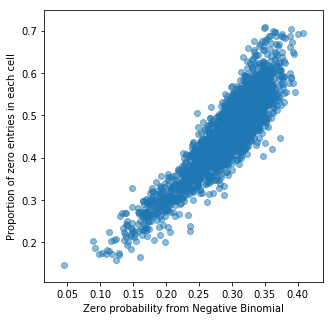

In [20]:
plt.figure(figsize=(5, 5))
plt.scatter(np.mean(process_proba(results["dropout"], results["mean"], results["dispersion"]), axis=1),\
        np.mean(data == 0, axis=1), alpha=0.5)
#plt.ylim((0.045, 0.27))
plt.xlabel("Zero probability from Negative Binomial")
plt.ylabel("Proportion of zero entries in each cell")
plt.savefig("unnormalized_zero_NB_genes.pdf", dpi=300)

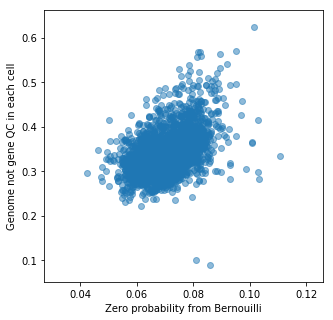

In [21]:
plt.figure(figsize=(5, 5))
plt.scatter(np.mean(process_proba(results["dropout"]), axis=1),\
        qc[:, 5], alpha=0.5)
#plt.ylim((0.045, 0.27))
plt.xlabel("Zero probability from Bernouilli")
plt.ylabel("Genome not gene QC in each cell")
plt.savefig("unnormalized_zero_B_genome.pdf", dpi=300)

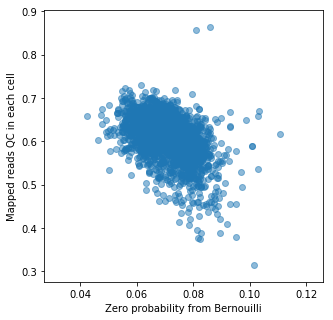

In [22]:
plt.figure(figsize=(5, 5))
plt.scatter(np.mean(process_proba(results["dropout"]), axis=1),\
        qc[:, 4], alpha=0.5)
#plt.ylim((0.045, 0.27))
plt.xlabel("Zero probability from Bernouilli")
plt.ylabel("Mapped reads QC in each cell")
plt.savefig("unnormalized_zero_B_mapped_reads.pdf", dpi=300)